<a href="https://colab.research.google.com/github/Dalton7718/Dalton_ML-projects/blob/main/Company_Bankruptcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split


In [76]:
#create a warngle function for our dataset
def wrangle(filepath):
  #read the data
  df = pd.read_csv(filepath)

  #return the df
  return df

In [77]:
#call the data using the wrangle function
df = wrangle("/content/company bankruptcy.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


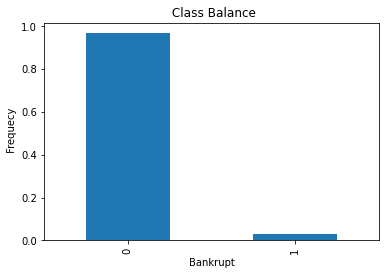

In [84]:
#check class imbalance
df["Bankrupt?"].value_counts(normalize=True)

#plot the class imbalance
df["Bankrupt?"].value_counts(normalize=True).plot(
    kind = "bar",
    xlabel = "Bankrupt",
    ylabel = " Frequecy",
    title = " Class Balance"
);

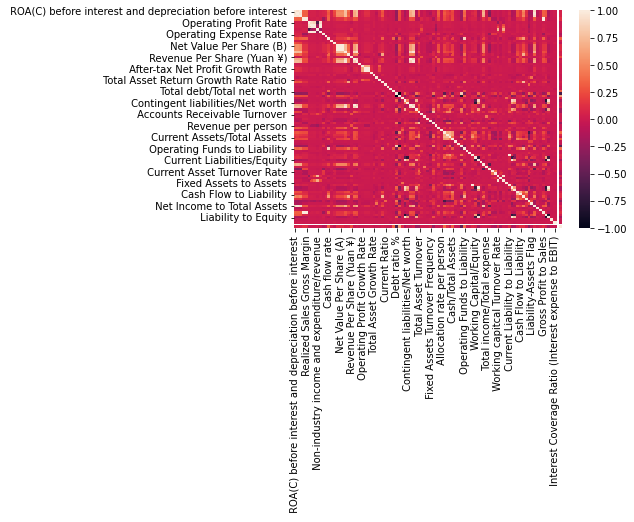

In [39]:
#correlation heatmap
corr = df.drop(columns = "Bankrupt?").corr()
sns.heatmap(corr);

In [40]:
#split the data
target = "Bankrupt?"
X = df.drop(columns =[ target])
y = df[target]

In [41]:
#train test split
X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   test_size=0.2)

#print out the shape
print("X_train shape:",X_train.shape)

X_train shape: (5455, 95)


In [42]:
#resample the dataset
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape",X_train_over.shape)
X_train_over.head()

X_train_over shape (10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [43]:
#create a baseline for our model
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", acc_baseline)


Baseline Accuracy: 0.969019248395967


In [44]:
#iterate
clf = make_pipeline(SimpleImputer(),
                    RandomForestClassifier(random_state=42))

In [45]:
#k fold validation
cv_acc_scores = cross_val_score(clf,
                                X_train_over,y_train_over,
                                cv=5,
                                n_jobs = -1)
print(cv_acc_scores)

[0.99338061 0.99479905 0.99432356 0.99668874 0.99432356]


In [46]:
#create a parameter grid
params = {
    "simpleimputer__strategy":["mean","median"],
    "randomforestclassifier__n_estimators":range(25,100,25),
    "randomforestclassifier__max_depth":range(10,50,10)
}
#print out the params
params

{'randomforestclassifier__max_depth': range(10, 50, 10),
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'simpleimputer__strategy': ['mean', 'median']}

In [48]:
#perform a grid search
model = GridSearchCV(
    clf,
    param_grid = params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [49]:
#fit the model
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [51]:
#make a grid search
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.097183,0.042651,0.021576,0.001981,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,21
1,1.244944,0.054738,0.025361,0.002715,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,21
2,2.132550,0.059714,0.035140,0.002138,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,19
3,2.269331,0.030875,0.034433,0.003090,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,19
4,3.005480,0.013369,0.044126,0.002110,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.980142,0.977294,0.979659,0.978713,0.979001,0.000977,23
5,3.127723,0.078118,0.047539,0.005514,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.980142,0.977294,0.979659,0.978713,0.979001,0.000977,23
6,1.278745,0.023341,0.022476,0.000900,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.985816,0.985816,0.990066,0.988647,0.988647,0.987798,0.001700,17
7,1.424780,0.041424,0.021973,0.000937,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.985816,0.985816,0.990066,0.988647,0.988647,0.987798,0.001700,17
8,2.516224,0.039800,0.036370,0.002510,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.987234,0.987707,0.989120,0.990066,0.987701,0.988366,0.001060,15
9,2.611263,0.041499,0.036023,0.002272,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.987234,0.987707,0.989120,0.990066,0.987701,0.988366,0.001060,15


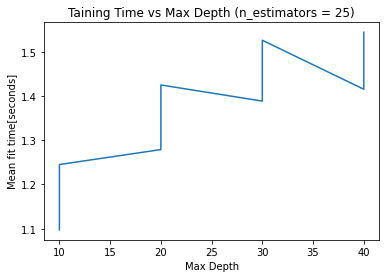

In [58]:
#Traing Time Vs Max Depth
#create a mask
mask = cv_results["param_randomforestclassifier__n_estimators"]==25
#plot the dataset
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
plt.xlabel("Max Depth")
plt.ylabel("Mean fit time[seconds]")
plt.title("Taining Time vs Max Depth (n_estimators = 25)");

In [82]:
#extract the best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

In [83]:
#get the best score
model.best_score_

0.99498692718363

In [60]:
#return the best model
model.best_estimator_


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=50,
                                        random_state=42))])

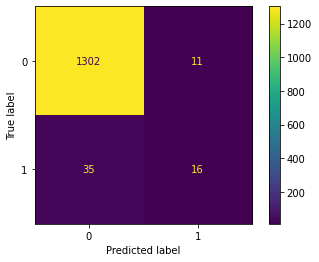

In [61]:
#confusion matrix display
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);


In [62]:
#extract feature importances

#get the features names from training data
features = X_train_over.columns

In [64]:
#get the importances
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_

In [65]:
#create a series
feat_imp = pd.Series(importances,index=features).sort_values()

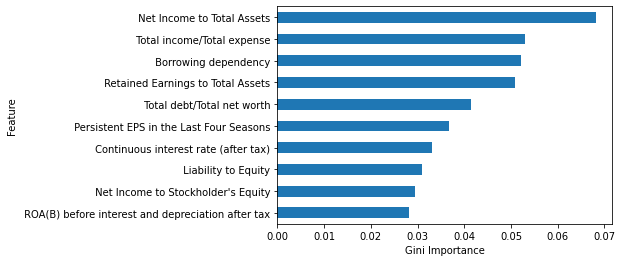

In [69]:
#plot
feat_imp.tail(10).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title=("Feature Importance");